In [1]:
!pip install Keras-Preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding,MaxPool1D
#from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#!gdown 1huW8jmOw4wfcLpm_uwegjiINOkTvAGVp
#!gdown 1GRUXJAenp4ffNzHP6eVlKJ3wK8pya5Jx
#!gdown 1kXb6zCpWff4S5tVamOJuEc_SKeviNmGE
!gdown 1HsDkVBOAjUlrLH3ntGfqMUDiORB6juTN
#!gdown 1hPtkM52muRLmpLgPaTW4tr_a4My8Y0XM


Downloading...
From: https://drive.google.com/uc?id=1HsDkVBOAjUlrLH3ntGfqMUDiORB6juTN
To: /content/preprocessed(2).csv
100% 15.8M/15.8M [00:00<00:00, 21.6MB/s]


In [ ]:
# df = pd.read_csv("Data_Hoax_Cleaned_Final.csv")
# df.head()

In [4]:
df = pd.read_csv("politik_cleaned.csv")
df.head()

,full_text,label,text_clean
0,Atalia Dituding Perpanjang Dinasti Politik kar...,0,atalia dituding perpanjang dinasti politik kar...
1,Tahun Baru. Saya harap ahli politik tanahair d...,1,tahun baru saya harap ahli politik tanahair da...
2,Saya cukup ghibah politik. Sudah diurus banyak...,1,saya cukup ghibah politik sudah diurus banyak ...
3,Buka X skrg udah kaya masuk kelas FISIP ajg is...,1,buka x skrg udah kaya masuk kelas fisip ajg is...
4,Saya menjual NASIHAT UNTUK SBY ~ politik ~ huk...,1,saya menjual nasihat untuk sby politik hukum p...


In [ ]:
# Select the relevant columns
df = df[["full_text", "label"]]

# Rename the columns to 'text' and 'label'
df.rename(columns={"full_text": "text", "label": "label"}, inplace=True)

# Convert the label column to integers (if needed)
#df['label'] = df['label'].astype('int')

# Replace empty strings with NaN and drop any rows with missing values
df.replace("", float("NaN"), inplace=True)
df.dropna(inplace=True)

# Reorder columns, though this may not be necessary if already in order
df = df[['text', 'label']]

# Display a random sample of 5 rows
df.sample(5)

<ipython-input-8-033d46142100>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"full_text": "text", "label": "label"}, inplace=True)
<ipython-input-8-033d46142100>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("", float("NaN"), inplace=True)
<ipython-input-8-033d46142100>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,text,label
933,knp kuliah hukum bikin gue bawel politik y pdh...,1
2238,Pada akhirnya orang-orang hanya berdebat untuk...,1
273,Gue tuh dulu inget nonton Debat Presiden untuk...,1
2947,Dulu kan ada kepentingan politik untuk menaikk...,1
4004,FASIS RELIGIUS LEBIH BURUK DARIPADA FASIS NASI...,1


In [5]:
df = df[["text_clean", "label"]]
df.rename(columns={"text_clean": "text", "label": "label"}, inplace=True)
# df.rename(columns={"Tweets": "text", "Label": "label"}, inplace=True)
# df["label"] = df["label"].map({"Hoax": 1, "Valid": 0})
df['label'] = df['label'].astype('int')
df.replace("", float("NaN"), inplace=True)
df.dropna(inplace=True)

df = df[['text', 'label']]

df.sample(5)

<ipython-input-5-012d123139f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"text_clean": "text", "label": "label"}, inplace=True)
<ipython-input-5-012d123139f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].astype('int')
<ipython-input-5-012d123139f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("", float("NaN"),

,text,label
4002,doanya dikabulkan isi doanya agar nyungsep mak...,1
2369,ketua umum partai demokrat berharap seluruh ta...,0
548,karena ini gue jadi dapet pelajar politik grat...,1
3239,nuduh dinasti dinasti seperti tdk menjalankan ...,1
443,terlepas dr konteks politik gue merasa hal serupa,1


In [6]:
df.shape

(4263, 2)

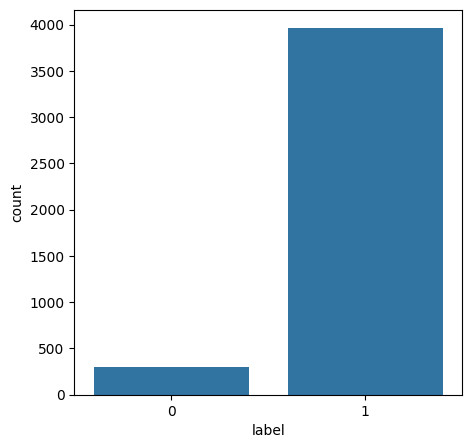

In [7]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df['label'])


# W2V


In [8]:
from gensim.models import Word2Vec

In [9]:
tokenized_tweet = df['text'].apply(lambda x: x.split())
tokenized_tweet

,text
0,"[atalia, dituding, perpanjang, dinasti, politi..."
1,"[tahun, baru, saya, harap, ahli, politik, tana..."
2,"[saya, cukup, ghibah, politik, sudah, diurus, ..."
3,"[buka, x, skrg, udah, kaya, masuk, kelas, fisi..."
4,"[saya, menjual, nasihat, untuk, sby, politik, ..."
...,...
4258,"[menteri, itu, jabatan, politik, meskipun, beg..."
4259,"[jeje, govinda, tak, kapok, terjun, ke, politi..."
4260,"[jauhi, jangan, layan, kelompok, anutan, narsi..."
4261,"[sebenarnya, kejadian, saat, ini, tuh, momentu..."


In [10]:
model = Word2Vec(sentences=tokenized_tweet, vector_size=100, window=3, min_count=1, workers=4)
model.save("word2vec.model")

In [11]:
model = Word2Vec.load("word2vec.model")
model.train(tokenized_tweet, total_examples=len(tokenized_tweet), epochs=10)

(936739, 1071370)

In [12]:
from gensim.models import KeyedVectors

word_vectors = model.wv
word_vectors.save("word2vec.wordvectors")

wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')
vector = wv['gagal']

vector

array([-0.27173942,  0.26537484,  0.30384508,  0.06096529,  0.03105438,
       -0.67876774,  0.33187512,  0.7435927 , -0.43826935, -0.48583457,
       -0.04543759, -0.57348686, -0.07315008,  0.2600218 ,  0.31601757,
       -0.32765177,  0.31343994, -0.3994768 , -0.21916   , -0.7173635 ,
        0.10975212,  0.3125408 ,  0.4154846 , -0.28060925, -0.10138661,
        0.22014534, -0.33991358, -0.26938576, -0.30205542,  0.21301134,
        0.35508668, -0.16927879,  0.15194906, -0.4143435 , -0.21527977,
        0.4978688 , -0.00624419, -0.26297987, -0.13717593, -0.74615145,
        0.25950384, -0.34567985, -0.25685003,  0.09121851,  0.2413498 ,
       -0.1465545 , -0.3137726 , -0.15034465,  0.25606674,  0.13086691,
        0.05630917, -0.48829496, -0.06155774,  0.02843226, -0.17614071,
        0.37340325,  0.39062223,  0.1937099 , -0.35139316,  0.15813072,
        0.22429398,  0.10025567, -0.09231867,  0.025311  , -0.29016656,
        0.40641093,  0.06115581,  0.32204214, -0.51832056,  0.29

In [13]:
X = df['text']
y = df['label']

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [15]:
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break

politik -> 1
gue -> 2
dan -> 3
di -> 4
yg -> 5
yang -> 6
ini -> 7
itu -> 8
ada -> 9
indonesia -> 10


In [16]:
maxlen = 700

X = pad_sequences(X, maxlen=maxlen)

In [17]:
vocab_size = len(tokenizer.word_index) + 1

In [18]:
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, 100))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [19]:
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, 100))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        if word in model:  # Check if the word is in the model
            weight_matrix[i] = model[word]
    return weight_matrix

In [20]:
embedding_vectors = get_weight_matrix(wv, word_index)

In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [22]:
kf = KFold(n_splits=10)

reports = []
confusions = []

for train_index, test_index in kf.split(X):

  X_train = X[train_index]
  y_train = y[train_index]

  X_test = X[test_index]
  y_test = y[test_index]

  model = Sequential()
  model.add(Embedding(vocab_size, output_dim=100, weights=[embedding_vectors], input_length=maxlen, trainable=False))
  #LSTM
  model.add(LSTM(units=128))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

  model.summary()
  model.fit(X_train, y_train, validation_split=0.3, epochs=6)

  y_pred = (model.predict(X_test) >= 0.5).astype("int")

  accuracy_score(y_test, y_pred)

  reports.append(classification_report(y_test, y_pred))
  confusions.append(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - acc: 0.9406 - loss: 0.2552 - val_acc: 0.8862 - val_loss: 0.2777
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - acc: 0.9467 - loss: 0.1645 - val_acc: 0.8836 - val_loss: 0.2993
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9447 - loss: 0.1722 - val_acc: 0.8836 - val_loss: 0.2825
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.9438 - loss: 0.1713 - val_acc: 0.8836 - val_loss: 0.4204
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - acc: 0.9424 - loss: 0.1713 - val_acc: 0.8862 - val_loss: 0.2777
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - acc: 0.9543 - loss: 0.1451 - val_acc: 0.8853 - val_loss: 0.2680
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - acc: 0.8850 - loss: 0.2759 - val_acc: 0.8836 - val_loss: 0.3092
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - acc: 0.9363 - loss: 0.1922 - val_acc: 0.8836 - val_loss: 0.3289
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - acc: 0.9418 - loss: 0.1868 - val_acc: 0.8836 - val_loss: 0.3040
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9390 - loss: 0.1847 - val_acc: 0.8853 - val_loss: 0.2877
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.9429 - loss: 0.1805 - val_acc: 0.8827 - val_loss: 0.2679
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - acc: 0.9473 - loss: 0.1682 - val_acc: 0.8853 - val_loss: 0.2749
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - acc: 0.8907 - loss: 0.2751 - val_acc: 0.8836 - val_loss: 0.3003
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9430 - loss: 0.1723 - val_acc: 0.8844 - val_loss: 0.2709
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.9486 - loss: 0.1767 - val_acc: 0.8871 - val_loss: 0.3051
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - acc: 0.9419 - loss: 0.1708 - val_acc: 0.8836 - val_loss: 0.3083
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - acc: 0.9572 - loss: 0.1365 - val_acc: 0.8862 - val_loss: 0.2737
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - acc: 0.9520 - loss: 0.1548 - val_acc: 0.8879 - val_loss: 0.2713
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - acc: 0.8880 - loss: 0.2754 - val_acc: 0.8837 - val_loss: 0.3215
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - acc: 0.9491 - loss: 0.1686 - val_acc: 0.8837 - val_loss: 0.2817
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - acc: 0.9427 - loss: 0.1756 - val_acc: 0.8845 - val_loss: 0.3253
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9455 - loss: 0.1669 - val_acc: 0.8854 - val_loss: 0.2689
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9497 - loss: 0.1645 - val_acc: 0.8828 - val_loss: 0.3193
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9386 - loss: 0.1866 - val_acc: 0.8828 - val_loss: 0.2753
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - acc: 0.8973 - loss: 0.2399 - val_acc: 0.8819 - val_loss: 0.3020
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9514 - loss: 0.1456 - val_acc: 0.8837 - val_loss: 0.3095
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - acc: 0.9550 - loss: 0.1450 - val_acc: 0.8845 - val_loss: 0.2964
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9646 - loss: 0.1244 - val_acc: 0.8845 - val_loss: 0.2830
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.9648 - loss: 0.1134 - val_acc: 0.8837 - val_loss: 0.3094
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - acc: 0.9600 - loss: 0.1331 - val_acc: 0.8880 - val_loss: 0.2782
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - acc: 0.9650 - loss: 0.2079 - val_acc: 0.8837 - val_loss: 0.3527
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.9651 - loss: 0.1375 - val_acc: 0.8837 - val_loss: 0.3735
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - acc: 0.9649 - loss: 0.1314 - val_acc: 0.8837 - val_loss: 0.3153
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - acc: 0.9645 - loss: 0.1317 - val_acc: 0.8837 - val_loss: 0.3023
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.9624 - loss: 0.1390 - val_acc: 0.8837 - val_loss: 0.3030
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - acc: 0.9605 - loss: 0.1422 - val_acc: 0.8828 - val_loss: 0.3045
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - acc: 0.9331 - loss: 0.2316 - val_acc: 0.8854 - val_loss: 0.2793
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9501 - loss: 0.1643 - val_acc: 0.8837 - val_loss: 0.2871
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.9584 - loss: 0.1431 - val_acc: 0.8872 - val_loss: 0.2957
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - acc: 0.9443 - loss: 0.1725 - val_acc: 0.8845 - val_loss: 0.3143
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - acc: 0.9532 - loss: 0.1551 - val_acc: 0.8932 - val_loss: 0.2737
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - acc: 0.9476 - loss: 0.1651 - val_acc: 0.8837 - val_loss: 0.3397
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - acc: 0.9446 - loss: 0.2261 - val_acc: 0.8915 - val_loss: 0.2756
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - acc: 0.9475 - loss: 0.1676 - val_acc: 0.8932 - val_loss: 0.2857
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - acc: 0.9470 - loss: 0.1749 - val_acc: 0.8924 - val_loss: 0.2759
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.9501 - loss: 0.1608 - val_acc: 0.8932 - val_loss: 0.3169
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9449 - loss: 0.1600 - val_acc: 0.8932 - val_loss: 0.2824
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9591 - loss: 0.1376 - val_acc: 0.8976 - val_loss: 0.2840
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - acc: 0.9200 - loss: 0.2407 - val_acc: 0.9106 - val_loss: 0.2240
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - acc: 0.9493 - loss: 0.1626 - val_acc: 0.9123 - val_loss: 0.2339
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - acc: 0.9473 - loss: 0.1755 - val_acc: 0.9106 - val_loss: 0.2161
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.9569 - loss: 0.1496 - val_acc: 0.9115 - val_loss: 0.2155
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.9479 - loss: 0.1602 - val_acc: 0.9115 - val_loss: 0.2305
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9525 - loss: 0.1508 - val_acc: 0.9115 - val_loss: 0.2367
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - acc: 0.9492 - loss: 0.2401 - val_acc: 0.9106 - val_loss: 0.2624
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - acc: 0.9421 - loss: 0.1704 - val_acc: 0.9106 - val_loss: 0.2668
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - acc: 0.9529 - loss: 0.1493 - val_acc: 0.9115 - val_loss: 0.2339
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9476 - loss: 0.1643 - val_acc: 0.9097 - val_loss: 0.2364
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.9584 - loss: 0.1432 - val_acc: 0.9123 - val_loss: 0.2406
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.9536 - loss: 0.1528 - val_acc: 0.9106 - val_loss: 0.2477
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1, batch_size=32)  # Adjust epochs and batch size as needed

120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9410 - loss: 0.1825


In [25]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 700, 100)            │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,932,733 (7.37 MB)

 Trainable params: 117,377 (458.50 KB)

 Non-trainable params: 1,580,600 (6.03 MB)

 Optimizer params: 234,756 (917.02 KB)

In [26]:
for i in range (len(reports)):
  print(f"==========================={i+1}=============================")
  print("REPORT:")
  print(reports[i])

===========================1=============================
REPORT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.97      0.99      0.98       416

    accuracy                           0.97       427
   macro avg       0.49      0.50      0.49       427
weighted avg       0.95      0.97      0.96       427

===========================2=============================
REPORT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.99      1.00      1.00       424

    accuracy                           0.99       427
   macro avg       0.50      0.50      0.50       427
weighted avg       0.99      0.99      0.99       427

===========================3=============================
REPORT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.98      1.00      

In [27]:
def report(matrix):
  TP = matrix[1][1]
  TN = matrix[0][0]
  FP = matrix[1][0]
  FN = matrix[0][1]

  accuracy = (TP+TN)/(TP+FP+FN+TN)
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  errorRate = (FP+FN)/(TP+FP+FN+TN)
  f1 = 2*TP / (2*TP + FP + FN)

  print(f"Accuracy = {accuracy}")
  print(f"Precision = {precision}")
  print(f"Recall = {recall}")
  print(f"Error Rate = {errorRate}")
  print(f"f1-score = {f1}")

In [28]:
result = [[ 0,   0],[  0, 0],]

for i in range (len(confusions)):
  result = result + confusions[i]


In [29]:
print(f"Overall Performance")
report(result)

Overall Performance
Accuracy = 0.9265775275627492
Precision = 0.9954579863739591
Recall = 0.9304245283018868
Error Rate = 0.07342247243725077
f1-score = 0.9618432280872852
